### Using Girvan-Newman Edge Betweenness to Partition a Network

Mike Goodrich

Feb 2026, March 2024

CS 575

In [11]:
from matplotlib import pyplot as plt
import networkx as nx
import numpy as np

def get_NCM_Figure3_14():
    G = nx.Graph()
    G.add_nodes_from(range(0,14))
    G.add_edges_from([(0,1),(0,2),(1,2),(3,4),(3,5),(4,5),(8,9),(8,10),(9,10),(11,12),(11,13),(12,13),(2,6),(5,6),(7,8),(7,11),(6,7)])
    pos = nx.spring_layout(G)
    return G, pos

def draw_edge_by_type(G, pos, edge, partition):
    edge_style = 'dashed'
    for part in partition:
        if edge[0] in part and edge[1] in part:
            edge_style = 'solid'
            break
    nx.draw_networkx_edges(G, pos, edgelist=[edge], style = edge_style)

def show_partitions(G,partition_list, pos = None):
    color_list = ['c','m','y','g','r']
    plt.figure()
    plt.axis('off')
    if pos is None: pos = nx.spring_layout(G, seed = 10)
    for i in range(len(partition_list)):
        nx.draw_networkx_nodes(partition_list[i],pos,node_color=color_list[i%len(color_list)], alpha = 0.8)
    for edge in G.edges:
        draw_edge_by_type(G, pos, edge, partition_list)
    nx.draw_networkx_labels(G,pos)
    if len(G.edges) == 0:
        mod = 0
    else:
        mod = nx.algorithms.community.quality.modularity(G,partition_list)
    title = "Modularity = " + str(np.round(mod,2))
    plt.title(title)

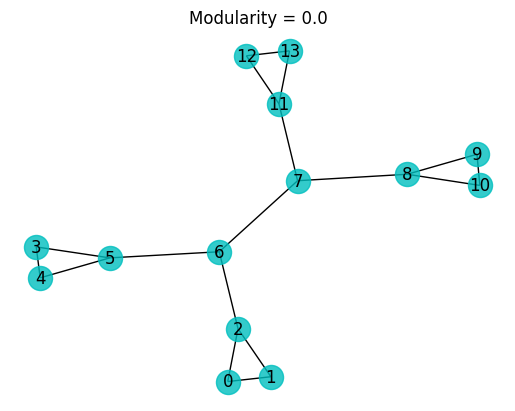

In [12]:
G, pos = get_NCM_Figure3_14() # network to be split
H, pos = get_NCM_Figure3_14() # reference network
show_partitions(G,[list(G.nodes),[]])

Find the edge with the highest betweenness value. Betweenness is computed using the breadth-first search method described by [Newman and Girvan](https://journals.aps.org/pre/pdf/10.1103/PhysRevE.69.026113) in their paper  Newman, Mark EJ, and Michelle Girvan. "Finding and evaluating community structure in networks." _Physical review_ E 69.2 (2004): 026113.

In [ ]:
# Normalized version of Newman-Girvan edge betweenness algorithm
from networkx import edge_betweenness_centrality as betweenness
def most_central_edge(G):
    """ From https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.centrality.girvan_newman.html"""
    edge_betweenness = betweenness(G, weight="weight")
    return max(edge_betweenness, key=edge_betweenness.get)
print(most_central_edge(G))

(6, 7)


Now fold it into an algorithm

```python
while num_components(G) == 1:
    edge = most_central_edge(G)
    G.remove_edge(edge)
``` 

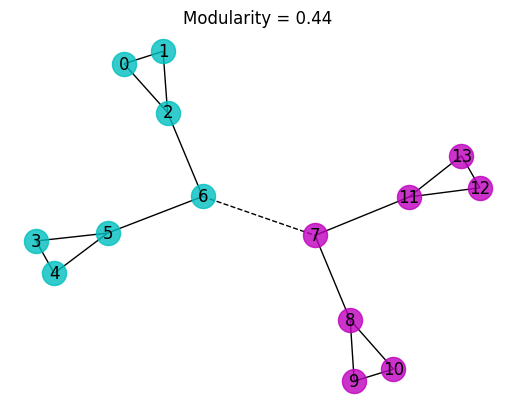

In [14]:
while nx.number_connected_components(G) == 1:
    edge = most_central_edge(G)
    G.remove_edge(edge[0], edge[1])
components = nx.connected_components(G)
show_partitions(H,list(components),pos) # show reference graph

Repeat

(2, 6)


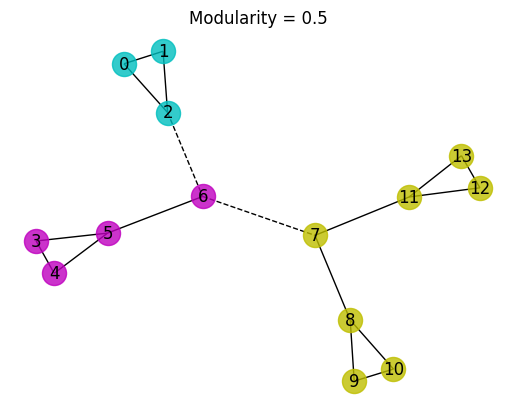

In [15]:
print(most_central_edge(G))
while nx.number_connected_components(G) == 2:
    edge = most_central_edge(G)
    G.remove_edge(edge[0], edge[1])
components = nx.connected_components(G)
show_partitions(H,list(components),pos)

And repeat again and again

(7, 8)


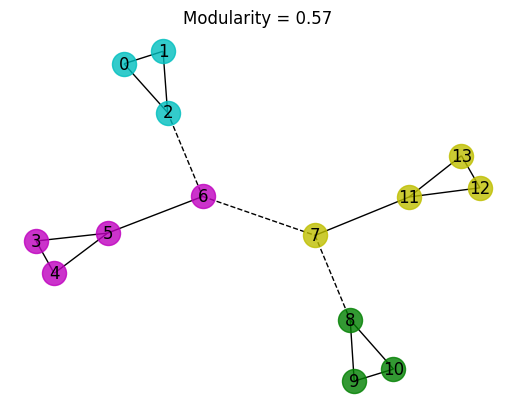

In [16]:
print(most_central_edge(G))
while nx.number_connected_components(G) == 3:
    edge = most_central_edge(G)
    G.remove_edge(edge[0], edge[1])
components = nx.connected_components(G)
show_partitions(H,list(components),pos)

Wrap all the pieces together

In [17]:
def split(G):
    num_components = nx.number_connected_components(G)
    while nx.number_connected_components(G) == num_components:
        edge = most_central_edge(G)
        G.remove_edge(edge[0], edge[1])
    return G


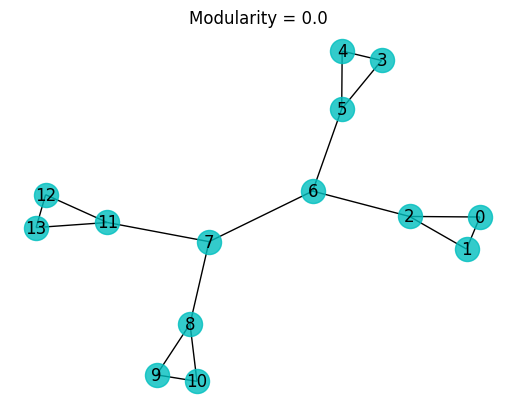

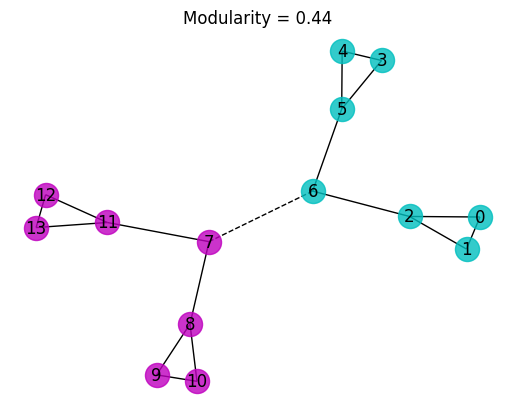

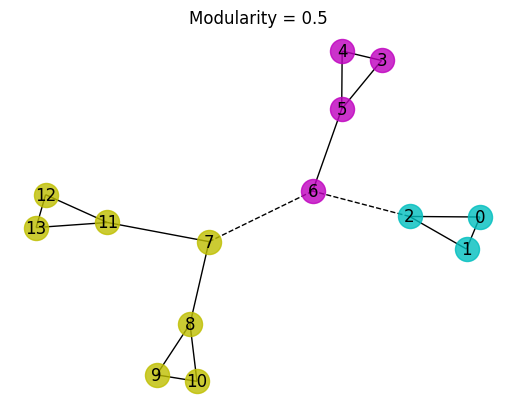

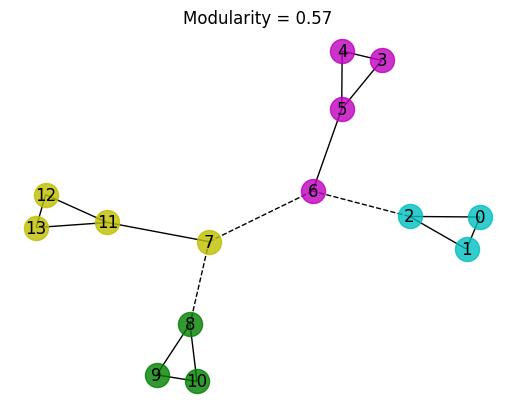

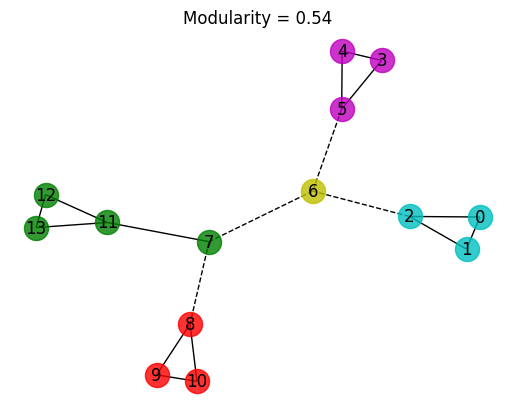

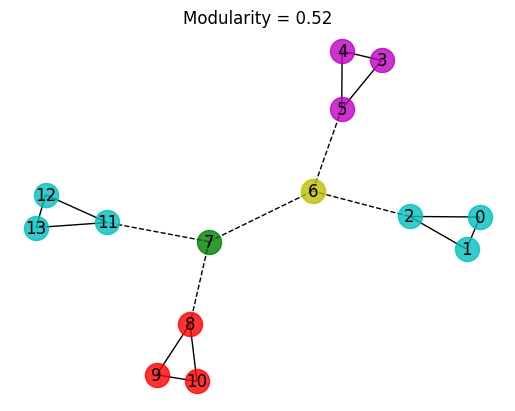

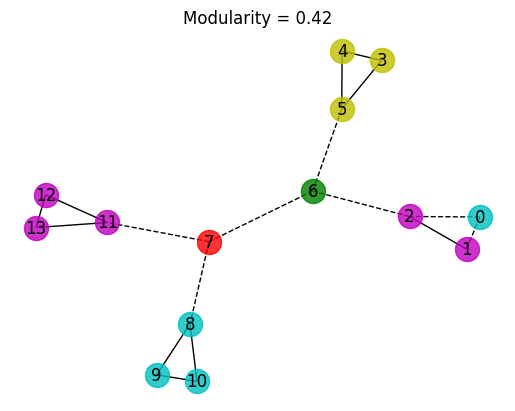

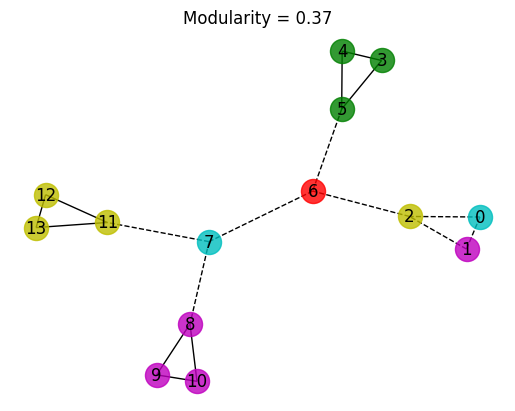

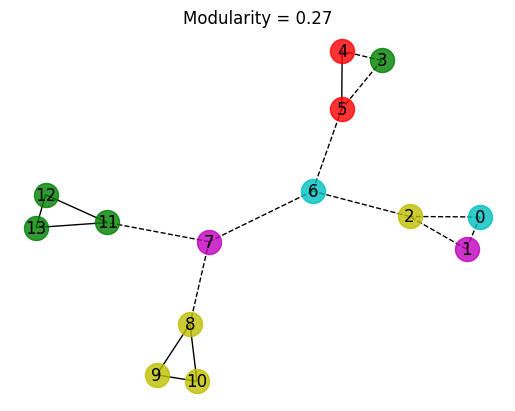

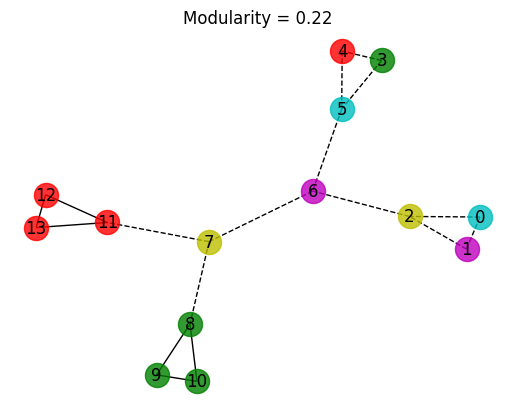

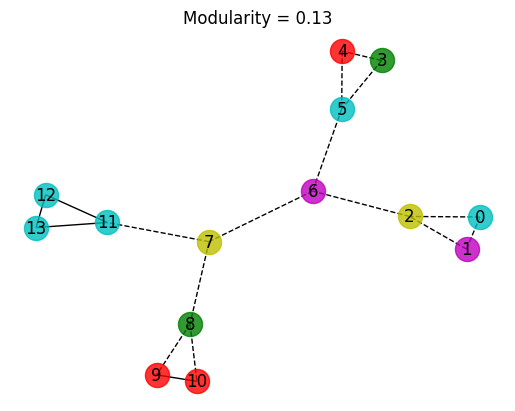

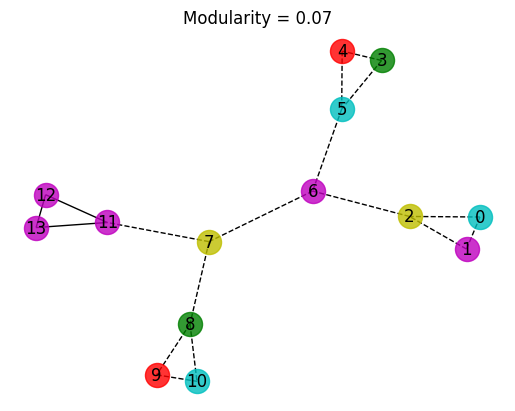

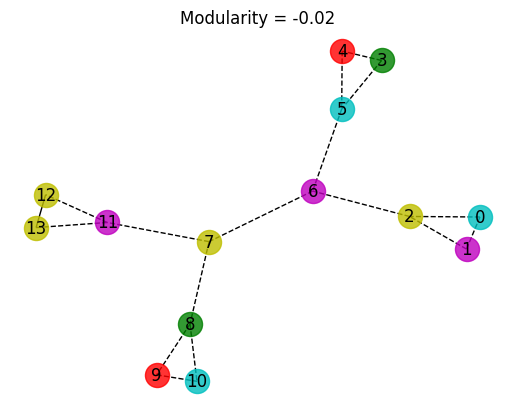

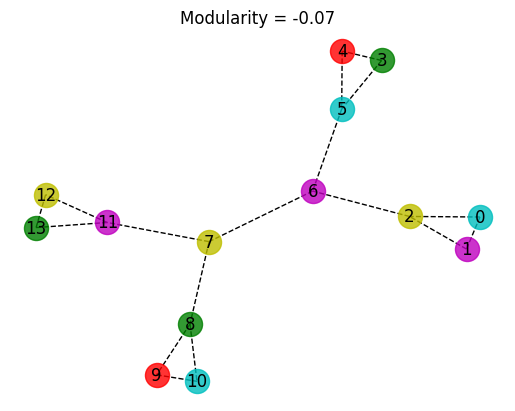

In [18]:

G, pos = get_NCM_Figure3_14()
H, pos = get_NCM_Figure3_14()
components = nx.connected_components(G)
show_partitions(H,sorted(list(components)),pos)
max_components = len(G)
old_num_components = nx.number_connected_components(G)
while nx.number_connected_components(G) < max_components:
    G = split(G)
    old_num_components = nx.number_connected_components(G)
    components = nx.connected_components(G)
    show_partitions(H,sorted(list(components)),pos)


---

#### Let's try a different network

In [19]:
def get_NCM_Figure4_2(two_color = True):
    G = nx.Graph()
    G.add_nodes_from(range(1,10))
    G.add_edges_from([[1,2],[1,3],[1,4],[1,5],[2,3],[2,4],[2,7],[2,8]])
    G.add_edges_from([[3,4],[4,5],[4,6],[4,7],[5,6],[6,7],[6,9],[7,8],[7,9],[8,9]])
    pos = nx.nx_pydot.graphviz_layout(G, prog="neato")
    return G, pos

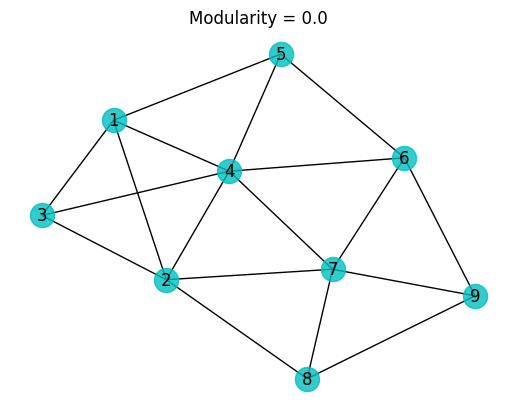

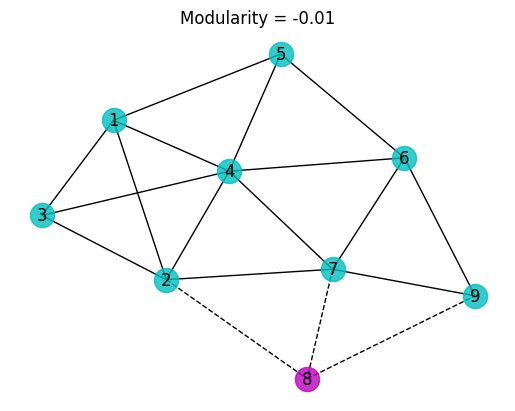

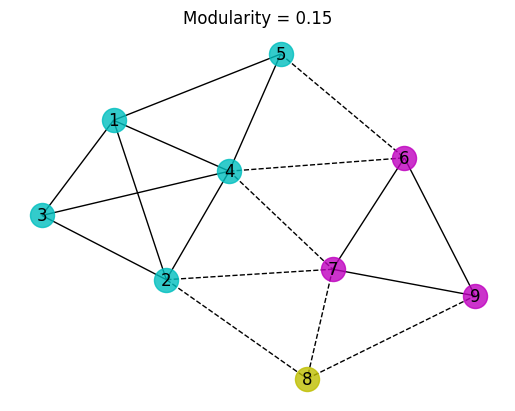

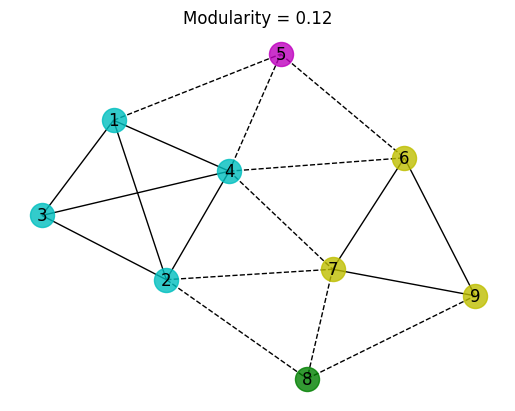

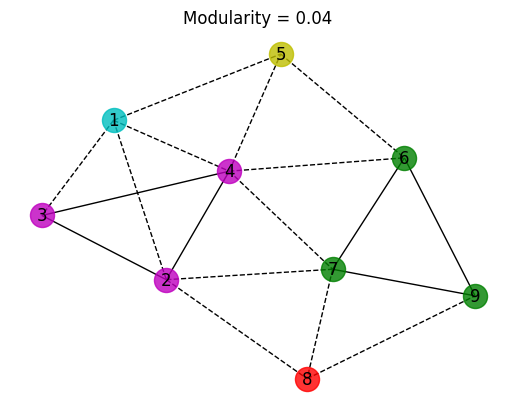

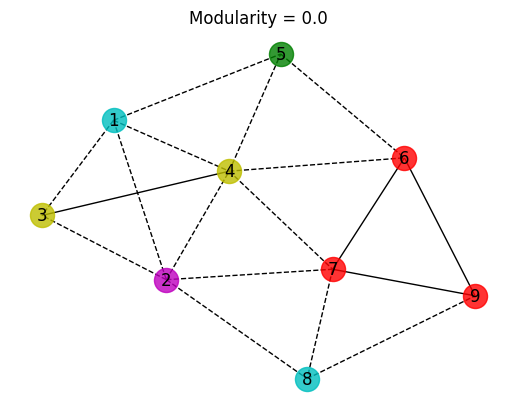

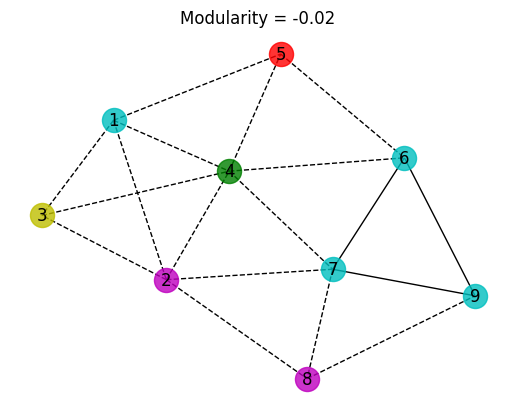

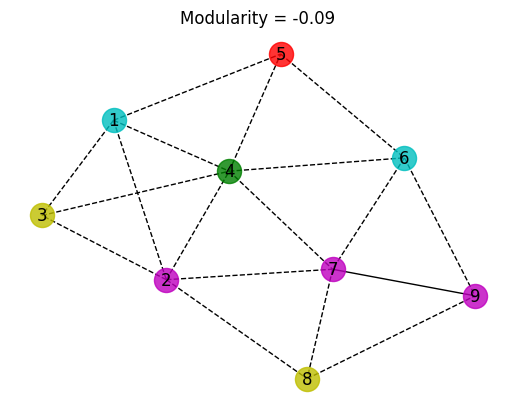

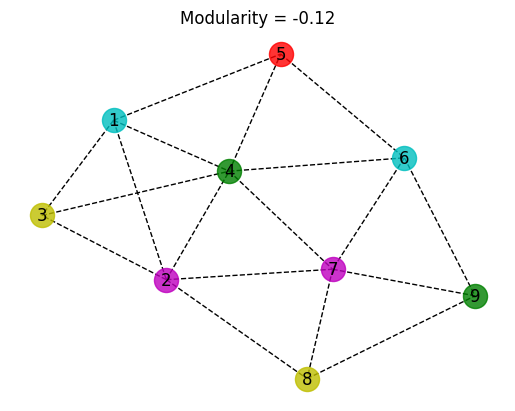

In [20]:
G, pos = get_NCM_Figure4_2()
H, pos = get_NCM_Figure4_2()
components = nx.connected_components(G)
show_partitions(H,sorted(list(components)),pos)
max_components = len(G)
old_num_components = nx.number_connected_components(G)
while nx.number_connected_components(G) < max_components:
    G = split(G)
    old_num_components = nx.number_connected_components(G)
    components = nx.connected_components(G)
    show_partitions(H,sorted(list(components)),pos)